In [153]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Read the dataset

In [129]:
df = pd.read_csv("car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Check number of missing values


In [130]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

Check the number of rows and columns

In [131]:
df.shape

(301, 9)

In [132]:
# getting some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [133]:
print(df.Fuel_Type.value_counts())
print(df.Seller_Type.value_counts())
print(df.Transmission.value_counts())
print(df.Transmission.value_counts())
print(df.Owner.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64
0    290
1     10
3      1
Name: Owner, dtype: int64


Encoding the Categorical Data

In [134]:
df.Fuel_Type = df.Fuel_Type.apply(lambda x: 1 if x == "Petrol" else(2 if x =="Diesel" else 3))

In [135]:
df.Fuel_Type.value_counts()

1    239
2     60
3      2
Name: Fuel_Type, dtype: int64

In [136]:
df.Seller_Type = df.Seller_Type.apply(lambda x :1 if x == "Dealer" else 0)

In [137]:
df.Transmission = df.Transmission.apply(lambda x: 1 if x == "Manual" else 0)

In [138]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,1,1,1,0
1,sx4,2013,4.75,9.54,43000,2,1,1,0
2,ciaz,2017,7.25,9.85,6900,1,1,1,0
3,wagon r,2011,2.85,4.15,5200,1,1,1,0
4,swift,2014,4.60,6.87,42450,2,1,1,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,2,1,1,0
297,brio,2015,4.00,5.90,60000,1,1,1,0
298,city,2009,3.35,11.00,87934,1,1,1,0
299,city,2017,11.50,12.50,9000,2,1,1,0


In [139]:
df.drop("Car_Name",axis = 1,inplace = True)

In [140]:
corelation = df.corr()
corelation

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,0.053643,0.039896,0.000394,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,0.509467,0.550724,-0.367128,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.440415,0.512030,-0.348715,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.166801,0.101419,-0.162510,0.089216
Fuel_Type,0.053643,0.509467,0.440415,0.166801,1.000000,0.352415,-0.080466,-0.055705
Seller_Type,0.039896,0.550724,0.512030,0.101419,0.352415,1.000000,-0.063240,-0.124269
Transmission,0.000394,-0.367128,-0.348715,-0.162510,-0.080466,-0.063240,1.000000,-0.050316
Owner,-0.182104,-0.088344,0.008057,0.089216,-0.055705,-0.124269,-0.050316,1.000000


<Axes: >

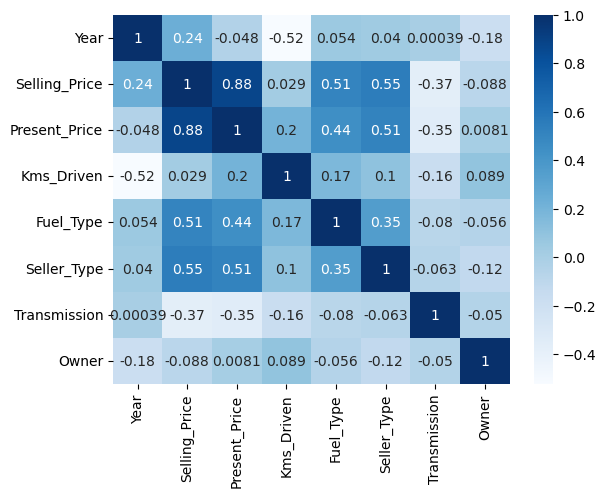

In [141]:
sns.heatmap(corelation, annot= True, cmap = "Blues")

Observations :
    Selling price is inversely proprtional to Owner count, Transmission and highly related with Present price 

In [142]:
X = df.drop("Selling_Price",axis = 1)
Y = df["Selling_Price"]
print(X.shape,Y.shape)

(301, 7) (301,)


In [143]:
#stratify wont be used as it is not a classification problem

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 1)

In [144]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(240, 7) (61, 7) (240,) (61,)


#### Model Training

1. Linear Regression

In [145]:
lr_model = LinearRegression()
lr_model.fit(X_train,Y_train)

LinearRegression()

In [146]:
train_predicted = lr_model.predict(X_train)

R squared Error

In [151]:
error_score = metrics.r2_score(Y_train, train_predicted)
print("R squared Error : ", error_score)

R squared Error :  0.8800594535535695


Visualize the actual prices and Predicted prices

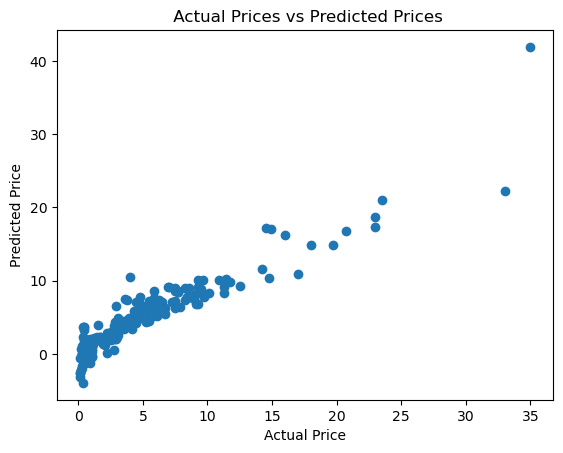

In [154]:
plt.scatter(Y_train, train_predicted)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [155]:
test_predicted = lr_model.predict(X_test)

In [156]:
error_score = metrics.r2_score(Y_test, test_predicted)
print("R squared Error : ", error_score)

R squared Error :  0.8484549412089482


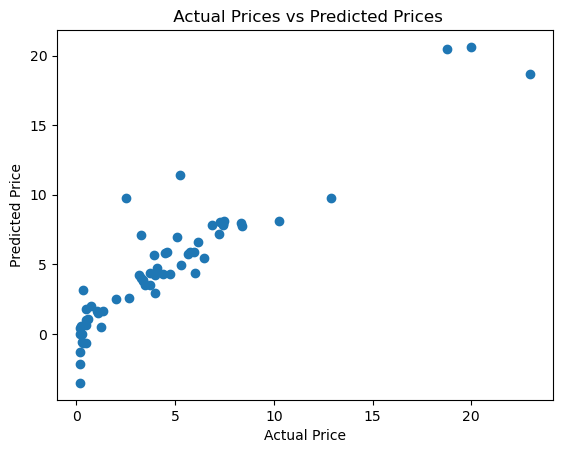

In [158]:
plt.scatter(Y_test, test_predicted)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

2. Lasso Regression

In [159]:
l_model = Lasso()
l_model.fit(X_train, Y_train)

Lasso()

In [161]:
train_predicted = l_model.predict(X_train)

R squared Error

In [162]:
error_score = metrics.r2_score(Y_train, train_predicted)
print("R squared Error : ", error_score)

R squared Error :  0.8416309679582049


Visualize the actual prices and Predicted prices

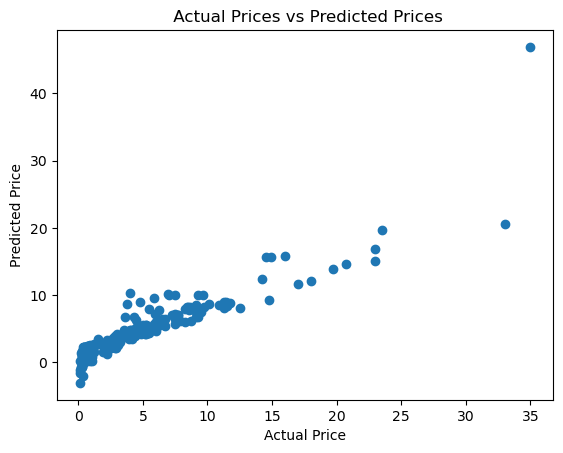

In [164]:
plt.scatter(Y_train, train_predicted)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

prediction on Training data


In [166]:
test_predicted = l_model.predict(X_test)

R squared Error

In [167]:
error_score = metrics.r2_score(Y_test, test_predicted)
print("R squared Error : ", error_score)

R squared Error :  0.8544755211923215


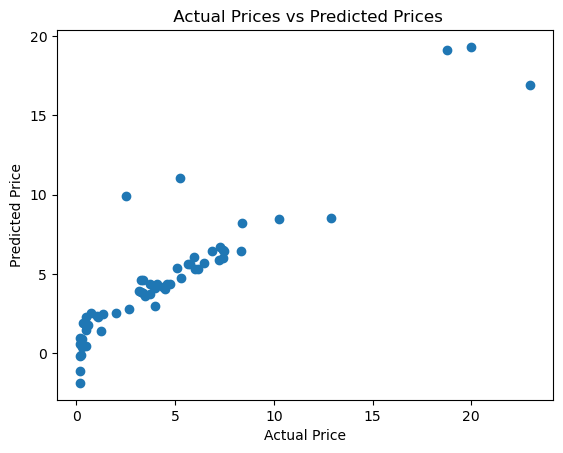

In [169]:
plt.scatter(Y_test, test_predicted)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()